In [75]:
import numpy as np
import os
import json
import tensorflow as tf
import albumentations as albu
import cv2
from n2v.models import N2V
import matplotlib.pyplot as plt
import cv2
from skimage.restoration import estimate_sigma

In [76]:
def estimate_noise(image_path):
    img = cv2.imread(image_path)
    return estimate_sigma(img, average_sigmas=True)

In [77]:
n_inputs=0
root_dir = "/kaggle/working"
input_noise=[]
denoised_noise=[]
for file in os.listdir(root_dir):
    if "input" in file:
        input_noise.append(estimate_noise(os.path.join(root_dir, file)))
        denoised_noise.append(estimate_noise(os.path.join(root_dir,file.replace('input', 'predict'))))
        print(f"Noise of {file} image {input_noise[-1]}")
        print(f"Noise of denoised {file} image {denoised_noise[-1]}")
        print("+++++++++++++")

/tmp/ipykernel_31/1110173647.py:3: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  return estimate_sigma(img, average_sigmas=True)


Noise of input_n2v_4.png image 1.6460191193452567e-16
Noise of denoised input_n2v_4.png image 8.230095596726284e-17
+++++++++++++
Noise of input_n2v_1.png image 5.0721880175694995e-49
Noise of denoised input_n2v_1.png image 5.0721880175694995e-49
+++++++++++++
Noise of input_n2v_3.png image 2.5360940087847498e-49
Noise of denoised input_n2v_3.png image 2.5360940087847498e-49
+++++++++++++
Noise of input_n2v_2.png image 4.0577504140555996e-48
Noise of denoised input_n2v_2.png image 4.0577504140555996e-48
+++++++++++++
Noise of input_n2v_9.png image 1.0144376035138999e-48
Noise of denoised input_n2v_9.png image 1.0144376035138999e-48
+++++++++++++
Noise of input_n2v_7.png image 1.0287619495907855e-17
Noise of denoised input_n2v_7.png image 1.0287619495907855e-17
+++++++++++++
Noise of input_n2v_5.png image 1.2680470043923749e-49
Noise of denoised input_n2v_5.png image 1.2680470043923749e-49
+++++++++++++
Noise of input_n2v_10.png image 1.0144376035138999e-48
Noise of denoised input_n2v_1

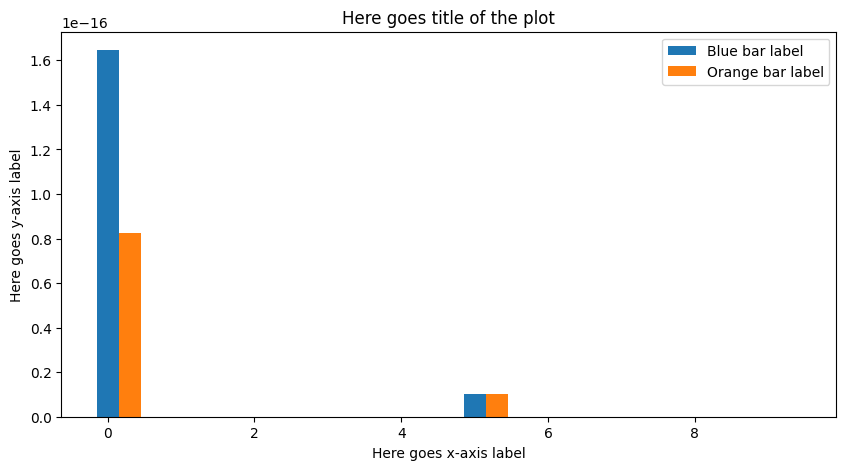

In [116]:
# Position of bars on x-axis
ind = np.arange(len(input_noise))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, input_noise , width, label='Blue bar label')
plt.bar(ind + width, denoised_noise, width, label='Orange bar label')

plt.xlabel('Here goes x-axis label')
plt.ylabel('Here goes y-axis label')
plt.title('Here goes title of the plot')
#plt.yscale('log')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
#plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3', 'Xtick3'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()


In [112]:
from skimage.metrics import structural_similarity as ssim_calc

def calc_metrics(image_path, image_2_path):
    img_input = cv2.imread(image_path)
    img_final = cv2.imread(image_2_path)

    # Convertir las imágenes a escala de grises
    img_input_gray = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)
    img_final_gray = cv2.cvtColor(img_final, cv2.COLOR_BGR2GRAY)

    # Calcular el índice de similitud estructural (SSIM)
    ssim = ssim_calc(img_input_gray, img_final_gray)

    # Calcular el índice de calidad de imagen (IQI)
    iqi = cv2.PSNR(img_input_gray, img_final_gray)
    return ssim, iqi

In [114]:
root_dir = "/kaggle/working"
metrics=[]
for file in os.listdir(root_dir):
    if "input" in file:
        metrics = calc_metrics(os.path.join(root_dir, file),
                           os.path.join(root_dir,file.replace('input', 'predict')))
        print(f"Metrics of {file} are: SSIM {metrics[0]}, PSNR {metrics[1]}")
        print("+++++++++++++")

Metrics of input_n2v_4.png are: SSIM 0.9078927567337296, PSNR 32.433397448868746
+++++++++++++
Metrics of input_n2v_1.png are: SSIM 0.9149338820124031, PSNR 32.7132233289506
+++++++++++++
Metrics of input_n2v_3.png are: SSIM 0.9655536248888389, PSNR 38.455924231081
+++++++++++++
Metrics of input_n2v_2.png are: SSIM 0.9820540033318138, PSNR 41.68398295305846
+++++++++++++
Metrics of input_n2v_9.png are: SSIM 0.9640469630104737, PSNR 37.447710518740976
+++++++++++++
Metrics of input_n2v_7.png are: SSIM 0.9875775238936024, PSNR 43.55212709926433
+++++++++++++
Metrics of input_n2v_5.png are: SSIM 0.957774245095659, PSNR 40.781916244833795
+++++++++++++
Metrics of input_n2v_10.png are: SSIM 0.8757088757393854, PSNR 29.82455013048169
+++++++++++++
Metrics of input_n2v_8.png are: SSIM 0.9453061615409545, PSNR 36.31751954835518
+++++++++++++
Metrics of input_n2v_6.png are: SSIM 0.9347693994650031, PSNR 35.82778328111673
+++++++++++++
